In [13]:
#imports 
from numpy import genfromtxt
import numpy as np
from matplotlib import pyplot  as plt

"""
-- Block Comment for File Retrieval --
genfromtxt() function gets the data from csv's and puts into 2 files
data contains the X and Y values for the training dataset
test contains the X and Y values for the test dataset
"""

file = open("Cereal_Train.csv", 'rb')
data = genfromtxt(file, delimiter = ",")
file = open("Cereal_Test.csv", 'rb')
test = genfromtxt(file, delimiter = ',')


In [14]:
"""
-- Block Comment for Feature Selection --
get calories, fat, carbs, sugars from both training and test 
calories is the 3rd column, fat is the 5th, carbs 8th, sugars 9th.
Hence, the indices 2, 4, 7, and 8 are used to retrieve the specific features.
np.c_ puts these 4 columns of data into X (n x 4 array) for training, T is for testing the model
"""
X = np.c_[data[:, 2], data[:, 4], data[:, 7], data[:, 8]]
X = np.delete(X, 0, 0)
T = np.c_[test[:, 2], test[:, 4], test[:, 7], test[:, 8]]
T = np.delete(T, 0, 0)

"""
-- Block comment for normalization -- 
normalizing by column the training (X) and testing (T) data with maximum value of columns
training data is now all between 0 and 1
for loop iterates through the columns and takes each value within the column
and divides it by the maximum value of the column
"""
for i in range(len(X[0])):
    X[:, i] = (X[:, i])/X[:, i].max()
    T[:, i] = (T[:, i])/T[:, i].max()

#get the Y (dependent variable) data - the Healthiness Score
Y = data[1:, -1]
#some descriptive statistics for the Y (cereal score)
print("Average Cereal Score: " + str(np.mean(Y)))
print("Standard Deviation of Cereal Score:" + str(np.std(Y)))
#get the Y values for the Test data
YT = test[1:, -1]

#descriptive statistics per column, mean and standard deviation
print("Descriptive statistics\nNormalized columns in order are: Calories, Fat, Carbs, Sugars")

for i in range(len(X[0])):
    xcol = X[:, i]
    print("column " + str(i+1))
    print("Mean: " + str(np.mean(xcol)))
    print("Std: " + str(np.std(xcol)))

Average Cereal Score: 42.234358027027035
Standard Deviation of Cereal Score:13.700434866515407
Descriptive statistics
Normalized columns in order are: Calories, Fat, Carbs, Sugars
column 1
Mean: 0.6680743243243243
Std: 0.12240795445449063
column 2
Mean: 0.3288288288288288
Std: 0.2976042641289897
column 3
Mean: 0.6345475910693301
Std: 0.18340976424259084
column 4
Mean: 0.4702702702702704
Std: 0.2936550021493152


Initial cost: 
985.7214567433666
Initial Weights: 
[[0]
 [0]
 [0]
 [0]]


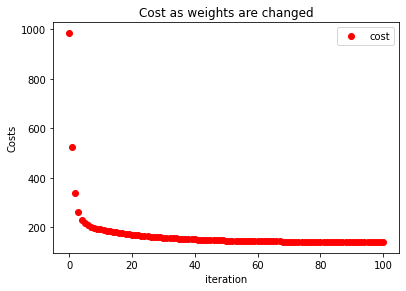

Final cost
139.57672228676194
Final Weights: 
[[ 35.16507918]
 [ -4.43753087]
 [ 38.81858057]
 [-15.41930151]]


In [15]:
#initialize weights
W = np.array([[0],[0],[0],[0]])

"""
-- Block Comment for calcCost -- 
computes Cost, a measure of how bad a model is
Input variables: X - predictors, W - weights, Y - dependent variable
cost formula is 1/2 the average of the squared residuals 
returns cost, a float
"""
def calcCost(X,W,Y):
    predictions = np.dot(X,W)
    predictions = np.reshape(predictions, Y.shape)
    cost = 1/(2*len(Y))*np.sum((predictions-Y)**2)
    return cost

"""
-- Block Comment for calcGradient --
computes the gradient for each column of X
given X - predictors, W - weights, Y - dependent variable
reshapes some arrays temporarily to allow for correct dot products
gradient calculated by averaging the value (cost)*(x_i) over all data points
returns the gradient for each column in X dataset, a 1 x 4 column in our case
"""
def calcGradient(X,W,Y):
    predictions = np.dot(X,W)
    cost = predictions-np.reshape(Y, (len(Y),1))
    grad = 1/len(Y)*(np.dot(np.reshape(cost, (len(cost[0]), len(cost))), X))
    return np.reshape(grad, (len(grad[0]), 1))

#set up some learing rates
lrList = [.3,.3]
lr = lrList[1]
#set up costArray, will hold all the costs in from the while loops
costArray = []
costArray.append(calcCost(X, W, Y))
#initial cost and weights output
print("Initial cost: ")
print(calcCost(X,W,Y))
print("Initial Weights: ")
print(W)
#initalize while Loop variables
finished = False
count =0
"""
-- Block Comment for linear regression loop --
-big while loop that does gradient 
-first calculates the gradient, then updates weights
-calculates new cost with the new weights
-loops back to use the new weights in another gradient calculation
-once loop is over, final weights have been calculated
-breaks once itereated more than 100 or if gradient vector is less than 0.0001
"""
while (not finished and count <100):
    gradient = calcGradient(X,W,Y)
    
    #update weights
    W = W - gradient*lr
    
    
    costArray.append(calcCost(X, W, Y))
    lengthOfGradientVector = np.linalg.norm(gradient)
    if (lengthOfGradientVector < .0001):
        finished=True
    count+=1

# Create graphs
fig = plt.figure()
ax = fig.add_axes([0.1,0.1,0.8,0.8])# [left, bottom, width, height]
ax.plot(np.arange(len(costArray)), costArray, "ro", label = "cost")
ax.set_title("Cost as weights are changed")
ax.set_xlabel("iteration")
ax.set_ylabel("Costs")
ax.legend()
plt.show()

#Final cost, final weights
print("Final cost")
print(calcCost(X,W,Y))
print("Final Weights: ")
print(W)

In [16]:
#run model on test data, using final weights W and test data T
#YT is the actual healthiness score of the test data
Tpred = np.dot(T,W)
testCost = calcCost(T,W,YT)
Tpred = np.reshape(Tpred, [1,3])
print("Predicted Test data Values")
print(Tpred)
print("True values")
print(YT)
print("Residuals")
print(Tpred - YT)
print("Test data cost: ")
print(testCost)

Predicted Test data Values
[[30.83567902 65.19238996 57.50728231]]
True values
[33.983679 72.801787 53.131324]
Residuals
[[-3.14799998 -7.60939704  4.37595831]]
Test data cost: 
14.49363971342215
